In [14]:
import numpy as np
import pandas as pd

In [15]:
df=pd.read_csv("./dataset/laptop_data.csv")

In [21]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [17]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [18]:
df["Ram"]=df["Ram"].str.replace("GB","")

In [20]:
df["Weight"]=df["Weight"].str.replace("kg","")

In [24]:
df["Ram"]=df["Ram"].astype("Int64")
df["Weight"]=df["Weight"].astype("float64")

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Company'>

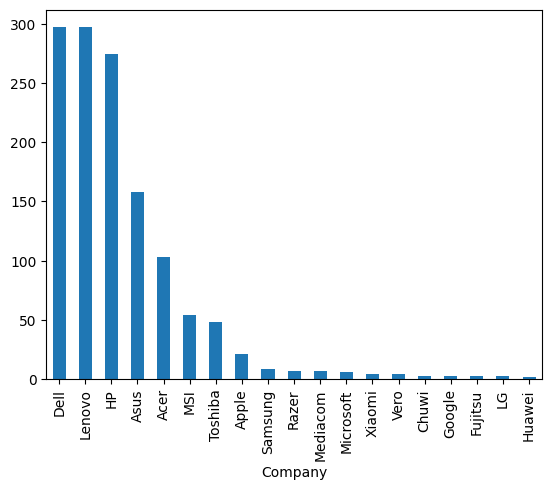

In [ ]:
df["Company"].value_counts().plot(kind="bar")


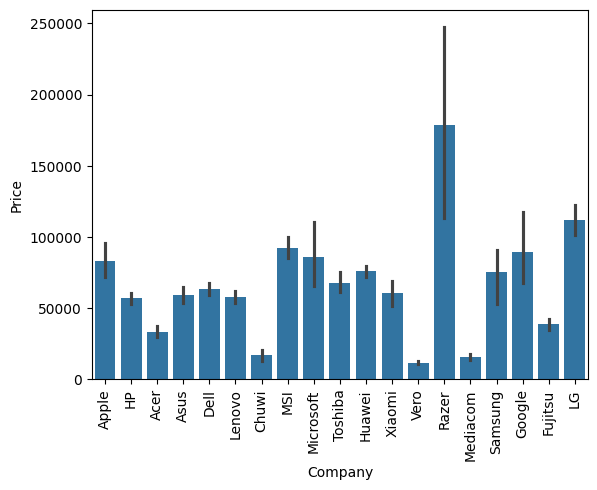

In [38]:
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

<Axes: xlabel='Ram'>

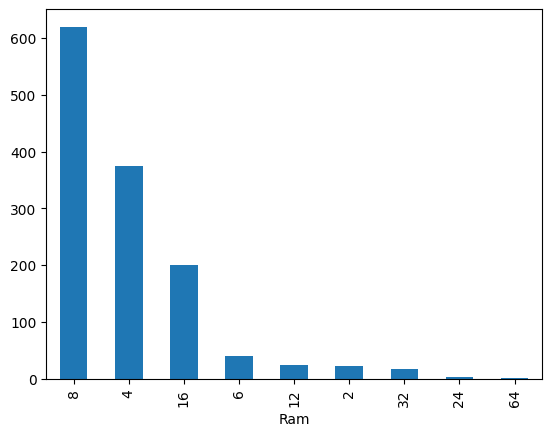

In [39]:
df["Ram"].value_counts().plot(kind="bar")

<Axes: xlabel='Ram', ylabel='Price'>

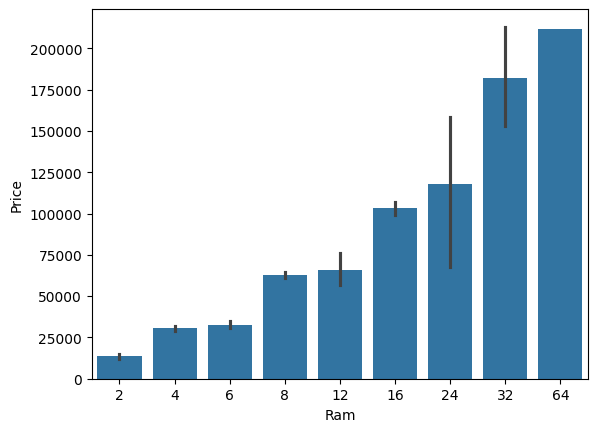

In [40]:
sns.barplot(x=df["Ram"],y=df["Price"])


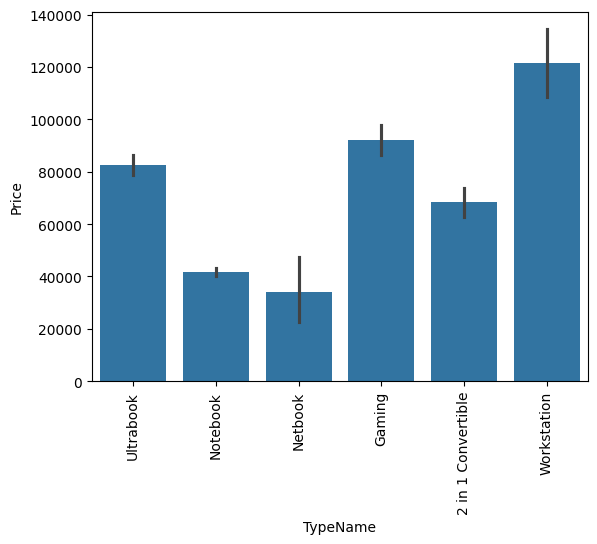

In [42]:
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.show()

In [82]:
df["TouchScreen"]=df["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0 )

In [101]:
df[['X_res', 'Y_res']] = (
    df['ScreenResolution']
    .str.split(" ").str[-1]
    .str.split("x", expand=True)
    .astype(int)
)

In [135]:
df.sample(n=7)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,PPI,CPU_Name
1065,Dell,Ultrabook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.29,77682.2400,0,165.632118,Intel Core i7
105,HP,Notebook,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.58,35111.5200,0,157.350512,Intel Core i5
185,Dell,Notebook,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Nvidia GeForce 150MX,Windows 10,2.77,82530.7200,1,127.335675,Intel Core i7
679,Acer,Gaming,Intel Core i5 7300HQ 2.5GHz,16,256GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,69210.7200,0,141.211998,Intel Core i5
233,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,45767.5200,0,157.350512,Intel Core i5
1139,HP,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.88,115709.2416,0,141.211998,Intel Core i7
593,Samsung,Notebook,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,90522.7200,0,141.211998,Intel Core i7


In [104]:
df["PPI"]=((df["X_res"]**2 + df["Y_res"]**2)**0.5) / df["Inches"].astype("float")

In [108]:
df.drop(columns=["ScreenResolution","Inches","X_res","Y_res"],inplace=True)

In [118]:
df["CPU_Name"]=df["Cpu"].str.split().str[:3].str.join(" ")


In [119]:
def fetch_processor_name(text):
    if "i7" in text or "i5" in text or "i3" in text:
        return text
    else:
        if text.split()[0]=='Intel':
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [130]:
df["CPU_Name"]=df["CPU_Name"].apply(fetch_processor_name)

In [110]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   str    
 1   TypeName     1303 non-null   str    
 2   Cpu          1303 non-null   str    
 3   Ram          1303 non-null   Int64  
 4   Memory       1303 non-null   str    
 5   Gpu          1303 non-null   str    
 6   OpSys        1303 non-null   str    
 7   Weight       1303 non-null   float64
 8   Price        1303 non-null   float64
 9   TouchScreen  1303 non-null   int64  
 10  PPI          1303 non-null   float64
dtypes: Int64(1), float64(3), int64(1), str(6)
memory usage: 113.4 KB
